# Dog Breed Classification using Tensorflow 
Here we are going to Detect the Dog Breed Using the Tensorflow and this is the basic 

* Problem :- To Identify the Dog Breed using the Given Image.
* Data :- https://www.kaggle.com/c/dog-breed-identification/data


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn
import tensorflow as tf
print(tf.__version__)
%matplotlib inline
plt.style.use('default')

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2.9.2
GPU available (YESSSS!!!!!)


In [2]:
import tensorflow_hub as hub 
print("TF Hub version:", hub.__version__)

TF Hub version: 0.12.0


## Import our Data to Turn into Tensors
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

In [3]:
# Checkout the labels of our data
labels_csv = pd.read_csv("drive/MyDrive/Datasets/Dog Vision/labels.csv")
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [4]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [5]:
# Checkout how many images are there in the dataset of each breed 
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

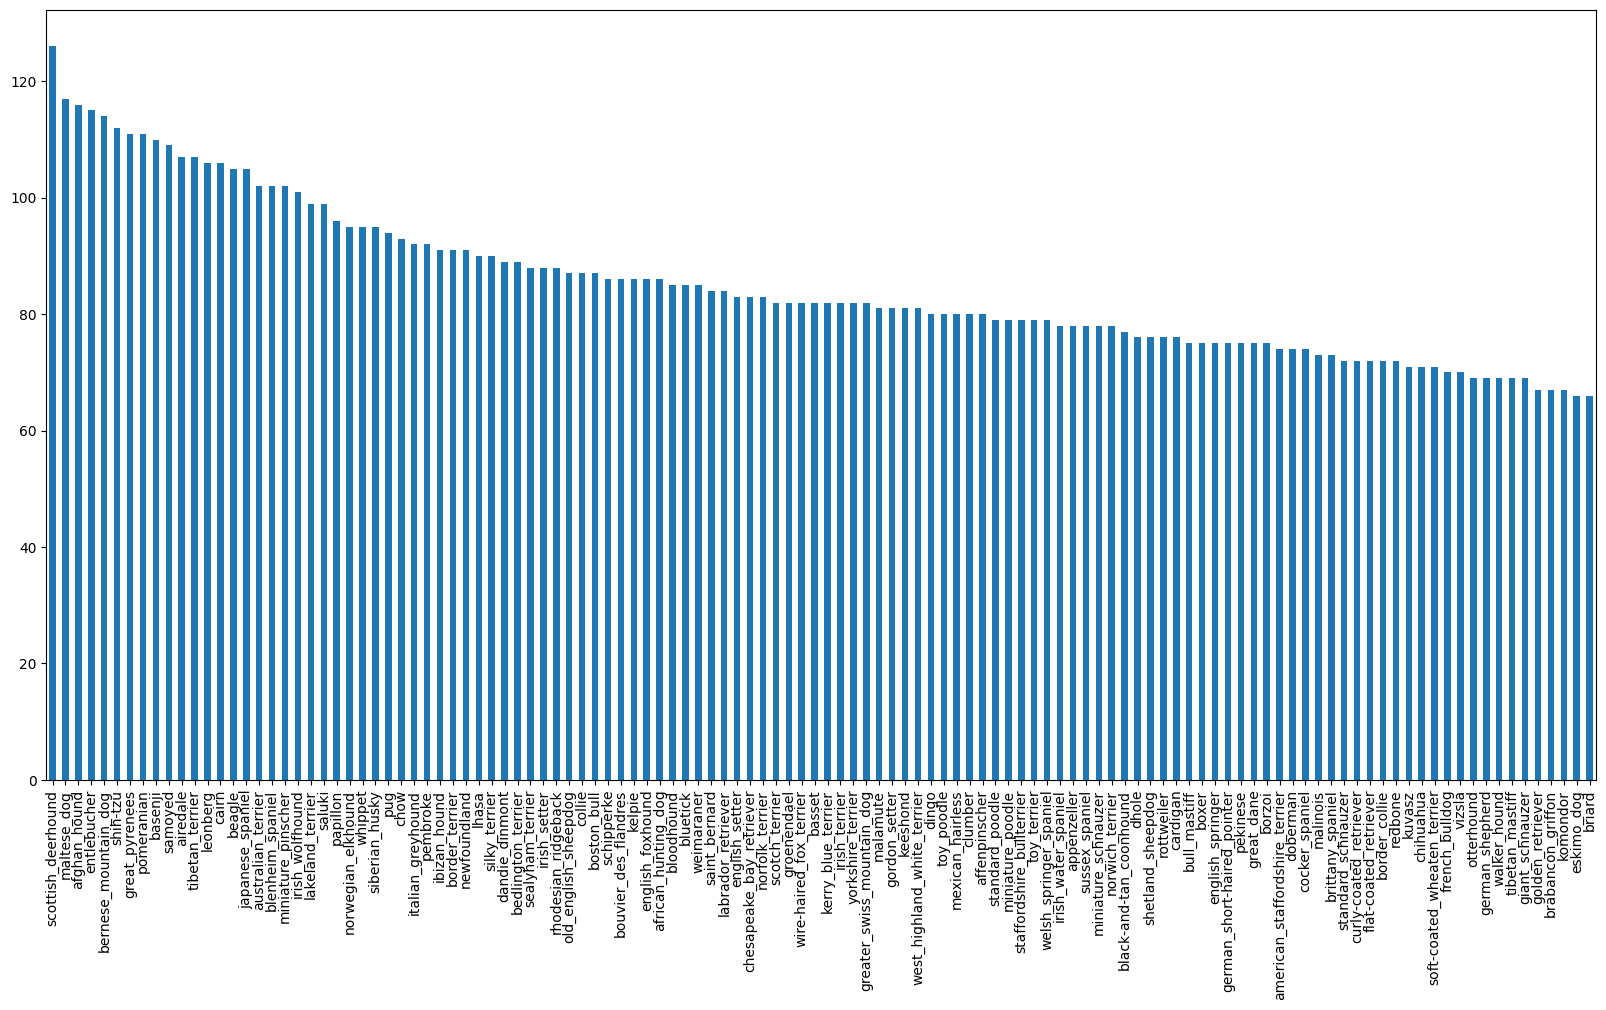

In [6]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

### Getting Images and Their Labels

In [7]:
# Creating the Pathway to access the images 
path_name = "drive/MyDrive/Datasets/Dog Vision/train/"
filenames = [path_name + fname + ".jpg" for fname in labels_csv["id"]] 
filenames[:10]

['drive/MyDrive/Datasets/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Datasets/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Checking the breed of any random dog image 
labels_csv["breed"][9008]

'cocker_spaniel'

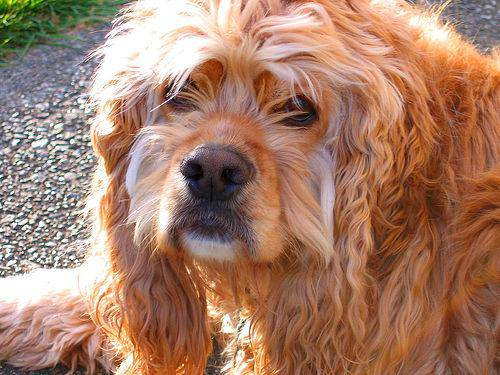

In [9]:
# Check the image which we teseted above 
from IPython.display import Image
Image(filenames[9008])

### Turning Data into Labels
it means we have to convert all the labels into numerical format becuase they are categorical

In [10]:
# Converting the labels into numerical
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [11]:
len(labels)

10222

In [12]:
# Checking the unique values in the labels 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [13]:
# let's check the unique breeds 
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
# Turn a Single label into an array of boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
# Turn every label into an array of boolean 
boolean_labels = [labels == unique_breeds for labels in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
len(boolean_labels)

10222

In [17]:
# Turning Boolean values into a Numerical Values 
print(labels[0])
print(np.where(unique_breeds == labels[0])) # Check where the index is occuring
print(boolean_labels[0].argmax()) # Index where the label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs 

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our Validation Set 

In [18]:
# Setup the X and y variables 
x = filenames
y = boolean_labels

In [19]:
len(filenames)

10222

In [20]:
# here we will use the 1000 images for training
# Set the number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000} 

In [21]:
# Lets Split the Data into training and validation set 
from sklearn.model_selection import train_test_split

# Split them into training and validation of the total sizeo of NUM_IMAGES
x_train , x_val , y_train , y_val = train_test_split(
    x[:NUM_IMAGES],
    y[:NUM_IMAGES],
    test_size = 0.2,
    random_state = 42
    )

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

### Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified `image`

In [22]:
# Convert Image to Numpy Array 
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [23]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [24]:
image.max() , image.min()

(255, 0)

In [25]:
# Convert Image to a Tensor 
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [26]:
# Define the Image Size 
IMG_SIZE = 224

# Create a Function for preprocessing the image
def process_image(image_path , image_size=IMG_SIZE):  # Take image path to convert into a tensor 
    # Read in an image file 
    image = tf.io.read_file(image_path)
    # Turn the Jpg Image into a numerical Tensor into a 3 Channel of RGB
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the Color channel to the value (Normalization) from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image , tf.float32)
    # Resize the Image to shape of (224,224)
    image = tf.image.resize(image , size = [IMG_SIZE , IMG_SIZE])

    return image


### Turning our data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`.

In [27]:
# Create a simple function to return a tuple (image , label)
def get_image_label(image_path , label):
    image = process_image(image_path)
    return image, label

In [28]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data `(X & y)` into batches!

In [29]:
# Define the batch size 
BATCH_SIZE = 32

# Create Function to turn the Data into batches 
def create_data_batches(x , y=None , batch_size = BATCH_SIZE , valid_data = False , test_data = False):
  
  # If the data is a test dataset we probably don't have labels 
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepath with no labels 
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is valid dataset then , we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((
        tf.constant(x), # filepath
        tf.constant(y),  # labels
    ))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating Training data batches...")
    # Turn filepath and labels into Tensors 
    data = tf.data.Dataset.from_tensor_slices((
        tf.constant(x),
        tf.constant(y),
    ))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [30]:
# Creating Training and Validation data batches 
train_data = create_data_batches(x_train , y_train)
val_data = create_data_batches(x_val , y_val , valid_data = True)

Creating Training data batches...
Creating validation data batches...


In [31]:
# Check out the Different attributes of our data batches 
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [32]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [33]:
# Unbatch the images 
train_images , train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [34]:
len(train_images) , len(train_labels)

(32, 32)

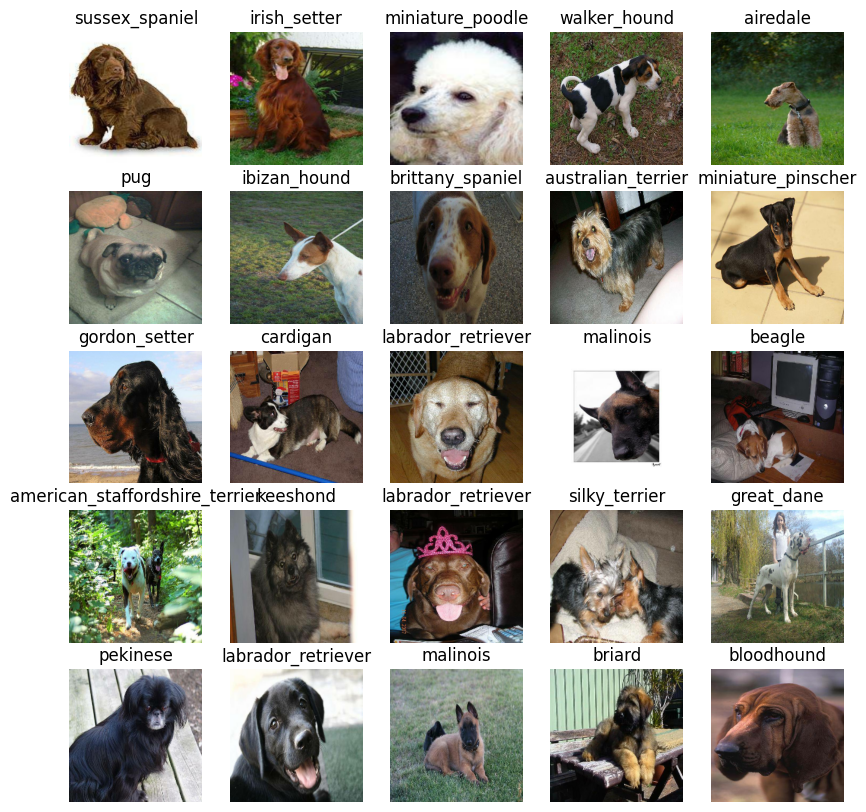

In [35]:
# Now lets vizualize the data in a training batch
show_25_images(train_images, train_labels)

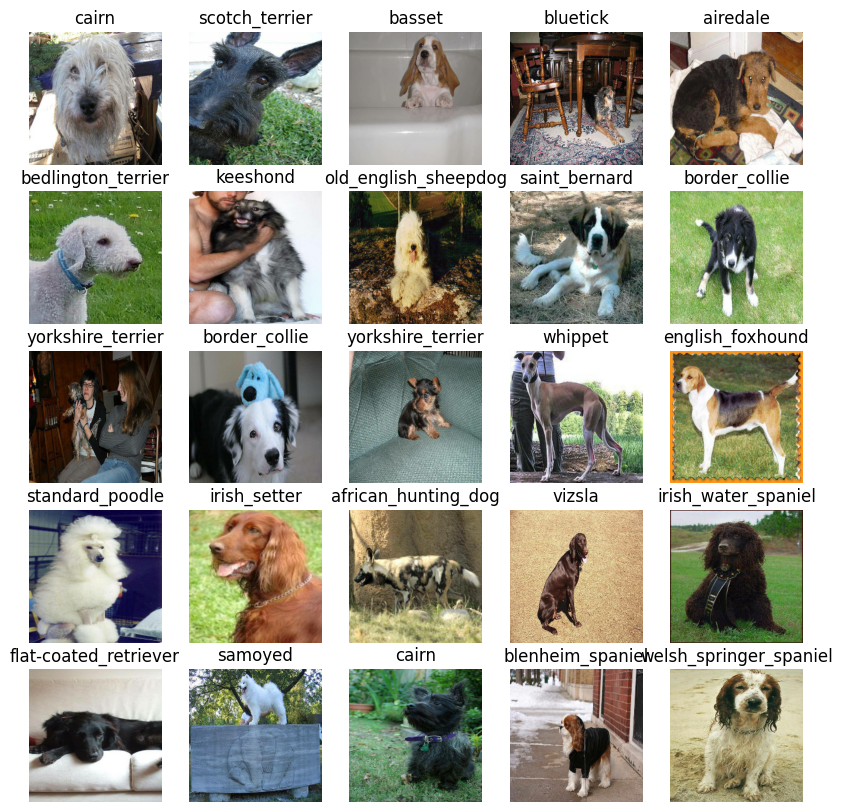

In [36]:
# # Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)


### Building a model
Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model.
The output shape (image labels, in the form of Tensors) of our model.

In [37]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [39]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and 3. pass it to our model's `fit()` function. ✅
4. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [47]:
# Load TensorBoard notebook extension
%load_ext tensorboard

import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard



### Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [48]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.

In [49]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [50]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [51]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 320s 12s/step - loss: 4.5725 - accuracy: 0.0900 - val_loss: 3.3733 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 3s 123ms/step - loss: 1.6591 - accuracy: 0.6913 - val_loss: 2.1884 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 3s 122ms/step - loss: 0.5820 - accuracy: 0.9325 - val_loss: 1.6648 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 3s 122ms/step - loss: 0.2618 - accuracy: 0.9875 - val_loss: 1.4933 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 4s 150ms/step - loss: 0.1484 - accuracy: 0.9975 - val_loss: 1.4099 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 4s 151ms/step - loss: 0.1038 - accuracy: 0.9987 - val_loss: 1.3750 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================


### Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [52]:
%tensorboard --logdir drive/My\ Drive/Data/logs

<IPython.core.display.Javascript object>

### Making and evaluating predictions using a trained model

In [53]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [54]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 107ms/step


array([[2.0367620e-04, 2.2289003e-05, 4.8212873e-04, ..., 1.2766468e-04,
        6.1436326e-06, 5.0518778e-03],
       [6.5982593e-03, 3.5311707e-04, 4.1422741e-03, ..., 9.1805018e-04,
        8.2989712e-04, 3.0161679e-04],
       [2.1214357e-05, 4.8172142e-04, 3.8207076e-05, ..., 7.6405739e-04,
        9.4129384e-05, 2.8532040e-03],
       ...,
       [4.7130229e-06, 1.2730158e-04, 5.5873745e-05, ..., 6.8929301e-05,
        2.1197203e-04, 3.0742420e-04],
       [6.4111082e-03, 4.8239683e-05, 6.6349363e-05, ..., 2.0346875e-04,
        2.5035630e-05, 3.1620341e-03],
       [5.2173232e-04, 1.0204623e-05, 2.5093777e-03, ..., 3.9906111e-03,
        1.5400575e-03, 1.7259328e-05]], dtype=float32)

In [55]:
predictions[0]

array([2.03676202e-04, 2.22890030e-05, 4.82128729e-04, 4.26250954e-05,
       3.14190314e-04, 1.07780734e-05, 3.31592821e-02, 1.51860513e-04,
       2.76260544e-04, 8.89084651e-04, 1.38930278e-04, 6.82747559e-05,
       1.86479621e-04, 1.37291412e-04, 1.24556493e-04, 8.43490532e-04,
       4.61631898e-05, 4.39510822e-01, 1.87565165e-05, 3.63170693e-05,
       1.07312365e-03, 4.41769043e-05, 6.87707825e-06, 4.24828555e-04,
       3.39589060e-05, 6.12027361e-05, 7.35440403e-02, 1.32878195e-04,
       3.28547176e-04, 7.52763444e-05, 5.92567922e-05, 1.97346136e-03,
       7.20009615e-04, 4.89269005e-05, 5.20727735e-05, 2.36310624e-02,
       2.48117522e-06, 9.58602031e-05, 2.29177604e-05, 1.93857544e-04,
       1.30205601e-03, 3.41307373e-06, 6.34995813e-05, 1.23677732e-04,
       1.03995437e-04, 2.29544621e-05, 3.70509551e-05, 5.15628199e-04,
       3.27076763e-04, 1.43035199e-04, 5.23503732e-05, 1.18766347e-05,
       9.04159024e-05, 2.71445115e-05, 3.02389544e-05, 2.58602950e-06,
      

In [56]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.26706887e-04 6.44517495e-05 6.33773452e-05 1.91148174e-05
 1.41664373e-03 6.37000776e-05 1.23145117e-04 1.63719652e-03
 3.16356961e-03 1.37319183e-02 7.56659065e-05 3.35308832e-05
 1.30785431e-03 2.96574621e-03 6.62035949e-04 2.66719586e-03
 5.01125651e-05 8.88251743e-05 3.91657777e-05 1.16339004e-04
 8.13502265e-06 3.25066212e-04 5.24796196e-05 4.54970032e-05
 1.16609316e-02 6.26943802e-05 1.52392677e-05 1.27838226e-04
 1.46325503e-04 1.70614177e-04 2.60329281e-04 8.42394147e-05
 7.25665013e-05 5.99569012e-06 2.32456441e-05 2.22720610e-05
 1.06045022e-03 9.25127169e-05 3.37619422e-05 1.86133176e-01
 1.50682550e-04 1.33636122e-05 1.86420965e-03 2.19938647e-05
 2.78524240e-04 4.32159286e-05 1.42957826e-04 1.46439575e-04
 6.06910544e-05 8.00204871e-05 1.19448239e-04 3.26472364e-05
 8.19792331e-05 1.47638295e-03 1.81526586e-04 2.96915357e-04
 2.33289349e-04 2.52550781e-05 2.24329615e-05 6.62600287e-05
 1.30040513e-04 2.33179482e-04 7.27605675e-06 5.58318861e-05
 6.52391027e-05 5.870436

In [57]:
unique_breeds[113]

'walker_hound'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

Note: Prediction probabilities are also known as confidence levels.

In [58]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images
Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [59]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [61]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

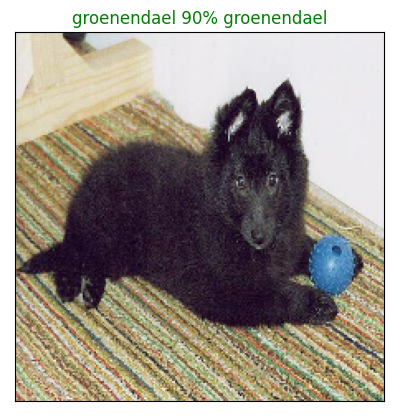

In [62]:

plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅
* Find the top 10:
  * Prediction probabilities indexes ✅
  * Prediction probabilities values ✅
  * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [63]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

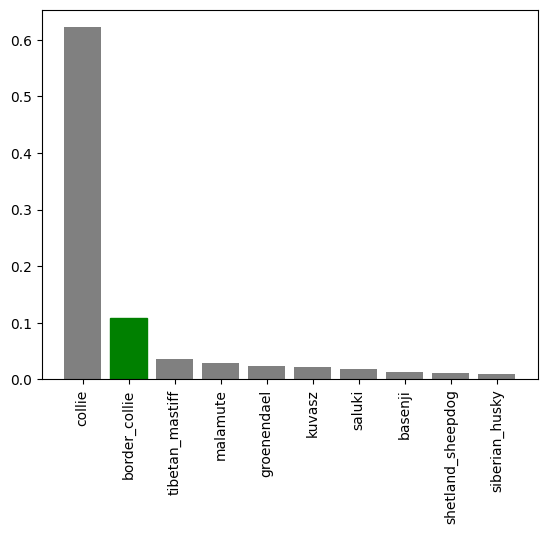

In [64]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

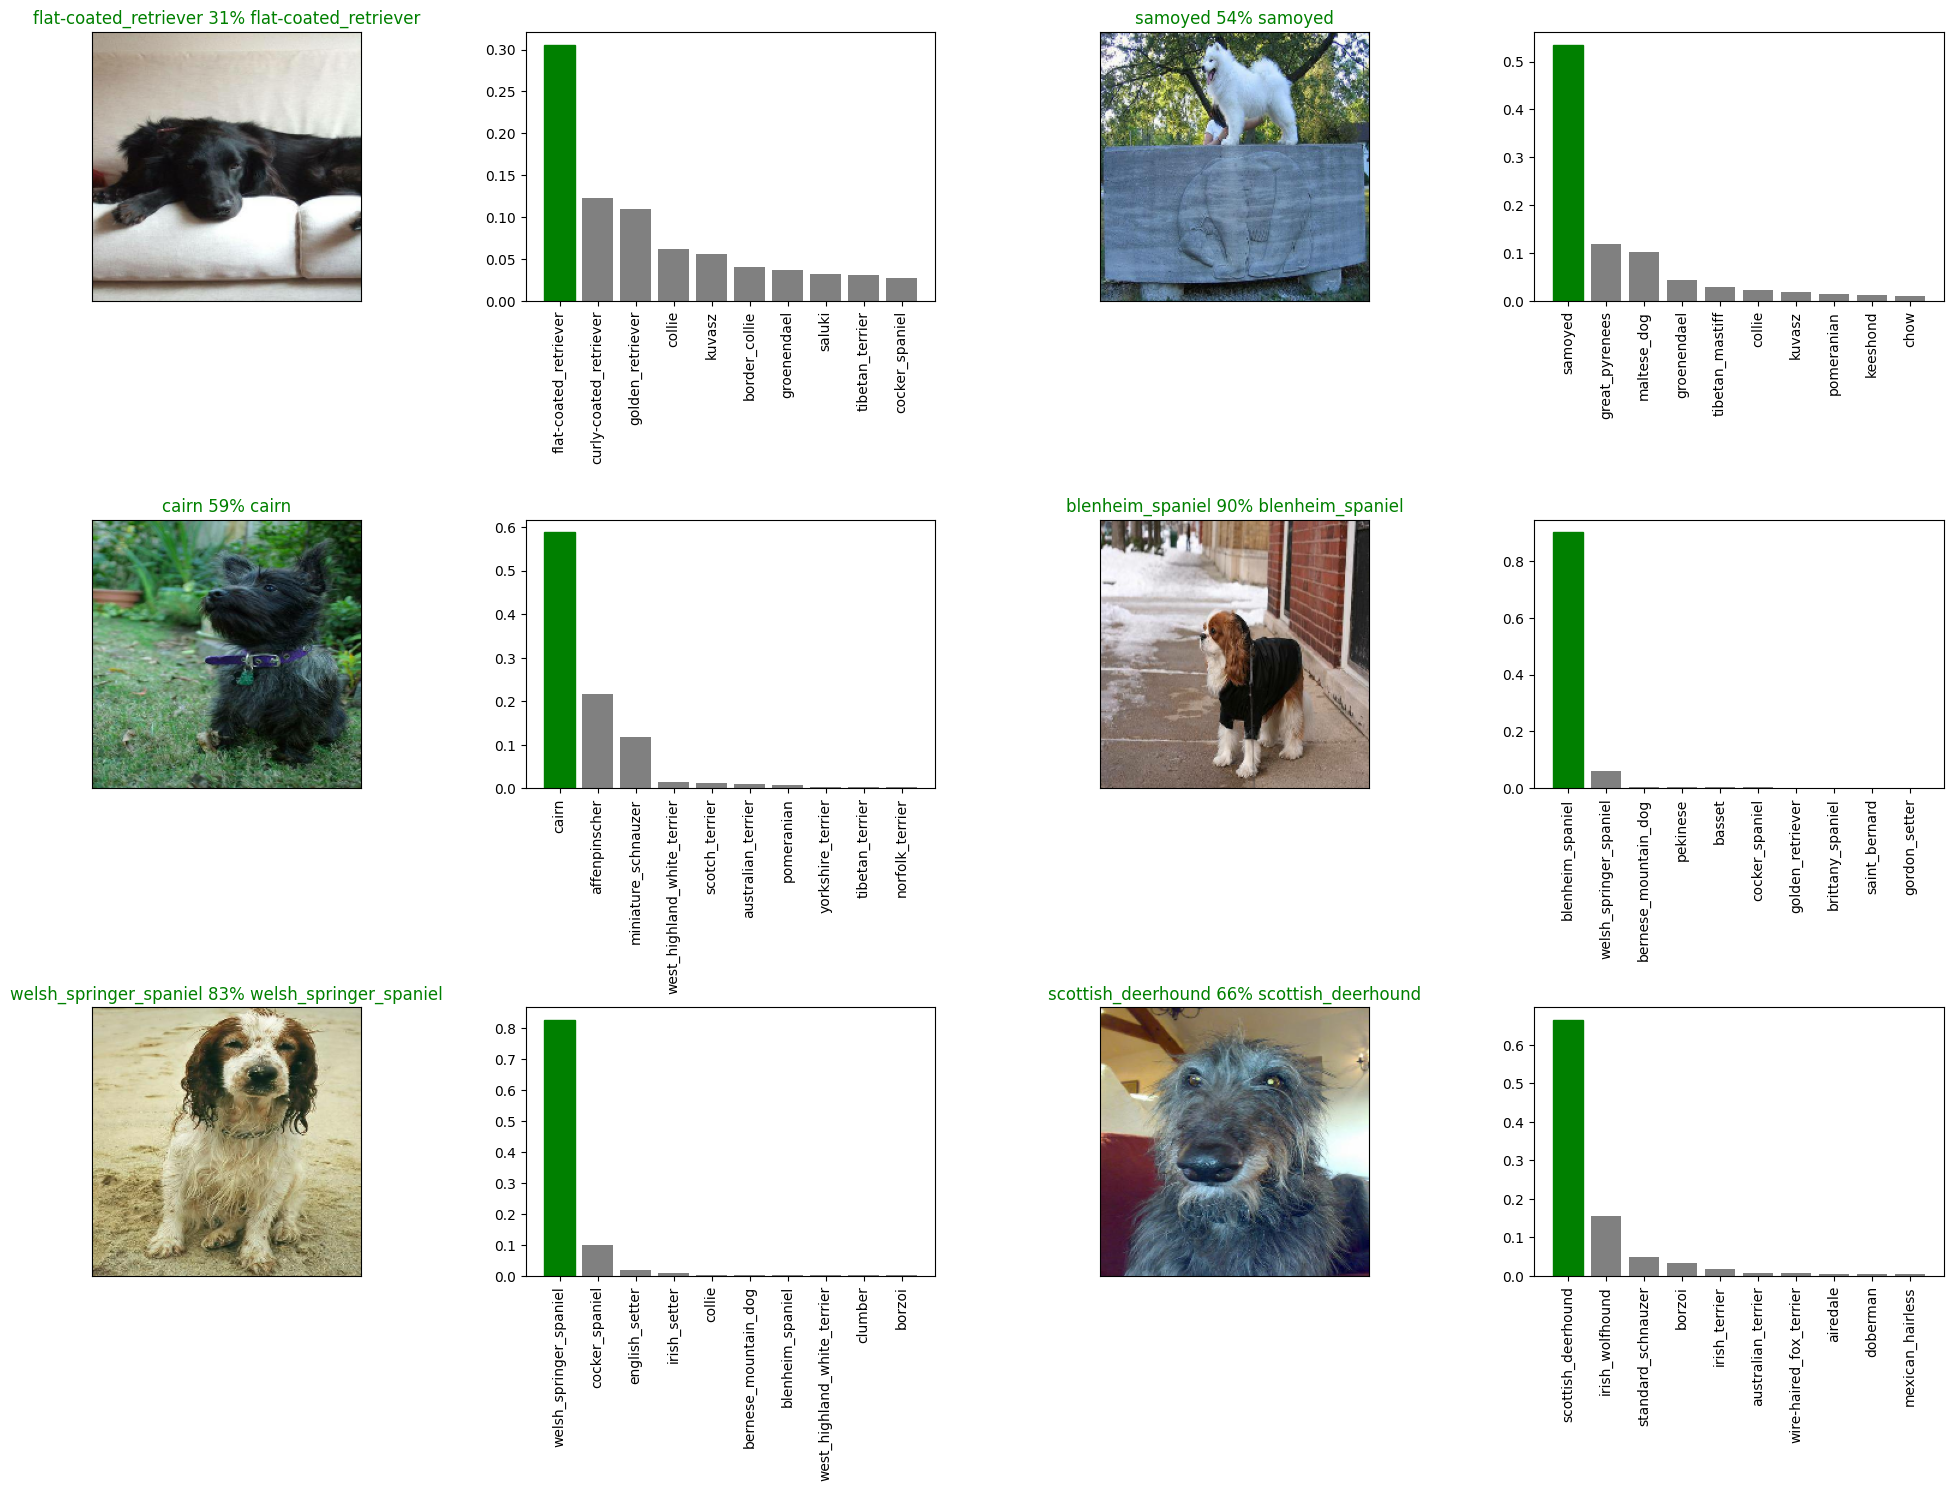

In [65]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


## Saving and reloading a trained model

In [66]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [67]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [68]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20221121-10571669028230-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20221121-10571669028230-1000-images-mobilenetv2-Adam.h5'

In [70]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20221121-10571669028230-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20221121-10571669028230-1000-images-mobilenetv2-Adam.h5


In [71]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 178ms/step - loss: 1.2436 - accuracy: 0.6600


[1.2436420917510986, 0.6600000262260437]

In [72]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 121ms/step - loss: 1.2436 - accuracy: 0.6600


[1.2436420917510986, 0.6600000262260437]

## Training a big dog model 🐶 (on the full data)

In [74]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)

Creating Training data batches...


In [75]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [76]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [77]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3347s 10s/step - loss: 1.3574 - accuracy: 0.6686
Epoch 2/100
320/320 [==============================] - 38s 120ms/step - loss: 0.4015 - accuracy: 0.8814
Epoch 3/100
320/320 [==============================] - 36s 113ms/step - loss: 0.2361 - accuracy: 0.9348
Epoch 4/100
320/320 [==============================] - 39s 123ms/step - loss: 0.1562 - accuracy: 0.9617
Epoch 5/100
320/320 [==============================] - 41s 129ms/step - loss: 0.1047 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 42s 131ms/step - loss: 0.0760 - accuracy: 0.9875
Epoch 7/100
320/320 [==============================] - 40s 124ms/step - loss: 0.0587 - accuracy: 0.9919
Epoch 8/100
320/320 [==============================] - 42s 130ms/step - loss: 0.0478 - accuracy: 0.9933
Epoch 9/100
320/320 [==============================] - 40s 125ms/step - loss: 0.0372 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 41s 129m

In [78]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20221121-12111669032705-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20221121-12111669032705-full-image-set-mobilenetv2-Adam.h5'

In [80]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20221121-12111669032705-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20221121-12111669032705-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [82]:
# Load test image filenames
test_path = "drive/My Drive/Datasets/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Datasets/Dog Vision/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7e9624f2a2e61ab187358f5968bfde8.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7e9dd51302fe08c1c89a550e183cf07.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7ed96b272013c6de9505a753816ce75.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg',
 'drive/My Drive/Datasets/Dog Vision/test/e800b6c8d2904e205d67ada800907762.jpg']

In [83]:
len(test_filenames)

10357

In [84]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [85]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 268s 784ms/step


In [87]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [88]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [89]:
test_predictions[:10]

array([[6.82928714e-07, 5.58003740e-06, 9.79013635e-07, ...,
        3.42416399e-07, 8.17284551e-09, 1.19329599e-07],
       [4.12117942e-07, 2.84170087e-09, 1.52032944e-05, ...,
        8.33068103e-09, 2.28697128e-09, 2.63932020e-06],
       [5.76664615e-06, 2.98495380e-08, 1.15934595e-08, ...,
        1.95791183e-09, 2.57120405e-06, 1.24847304e-06],
       ...,
       [1.88901493e-14, 6.22974762e-12, 1.76529269e-13, ...,
        5.04482046e-12, 9.56856231e-13, 2.54554640e-15],
       [1.23458150e-07, 4.79092660e-06, 1.36879184e-08, ...,
        1.69141590e-08, 2.27372880e-07, 1.48043211e-04],
       [1.84697299e-10, 1.12108300e-11, 4.68380612e-10, ...,
        5.37125568e-04, 7.01670970e-08, 2.63627592e-11]])

In [90]:
test_predictions.shape

(10357, 120)


## Making predictions on custom images
To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [91]:
# Get custom image filepaths
custom_path = "drive/My Drive/Datasets/Dog Vision Predict Images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [92]:
custom_image_paths

['drive/My Drive/Datasets/Dog Vision Predict Images/Labrador_on_Quantock_(2175262184).jpg',
 'drive/My Drive/Datasets/Dog Vision Predict Images/Dog_1084275958_Hearo.webp',
 'drive/My Drive/Datasets/Dog Vision Predict Images/800px-Mops_oct09_cropped2.jpg',
 'drive/My Drive/Datasets/Dog Vision Predict Images/ff1221fbfdb2fe163fdda15df5f77676.jpeg',
 'drive/My Drive/Datasets/Dog Vision Predict Images/german-shepherd-lying-on-the-grass-at-a-park.jpg',
 'drive/My Drive/Datasets/Dog Vision Predict Images/images.jpeg',
 'drive/My Drive/Datasets/Dog Vision Predict Images/MBS_DogEvolution_blg_031820.jpg']

In [93]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [94]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 3s 3s/step


In [95]:
custom_preds.shape

(7, 120)

In [96]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever',
 'brabancon_griffon',
 'pug',
 'golden_retriever',
 'german_shepherd',
 'doberman',
 'dingo']

In [97]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

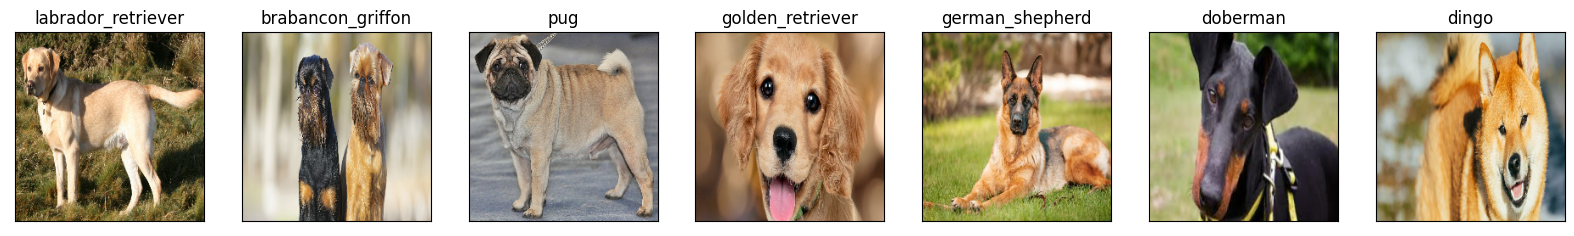

In [102]:
# Check custom image predictions
plt.figure(figsize=(20, 5))
for i, image in enumerate(custom_images):
  plt.subplot(1, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)